In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_csv("Housing.csv")
df.dropna(inplace=True)

In [27]:
#to convert categorical data to numeric
df = pd.get_dummies(df, drop_first=True)

In [29]:
print(df.columns)
print(df.head())

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')
      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2          True   
1  12250000  8960         4          4        4        3          True   
2  12250000  9960         3          2        2        2          True   
3  12215000  7500         4          2        2        3          True   
4  11410000  7420         4          1        2        2          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True    

In [31]:
# Check correlation matrix
print(df.corr(numeric_only=True)['price'].sort_values(ascending=False))

price                              1.000000
area                               0.535997
bathrooms                          0.517545
airconditioning_yes                0.452954
stories                            0.420712
parking                            0.384394
bedrooms                           0.366494
prefarea_yes                       0.329777
mainroad_yes                       0.296898
guestroom_yes                      0.255517
basement_yes                       0.187057
hotwaterheating_yes                0.093073
furnishingstatus_semi-furnished    0.063656
furnishingstatus_unfurnished      -0.280587
Name: price, dtype: float64


In [33]:
#Using one feature (e.g., area) to predict the target

In [35]:
X = df[['area']]  
y = df['price']    

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [39]:
# Metrics
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 2513702146563.3677
R² Score: 0.2091789534743358


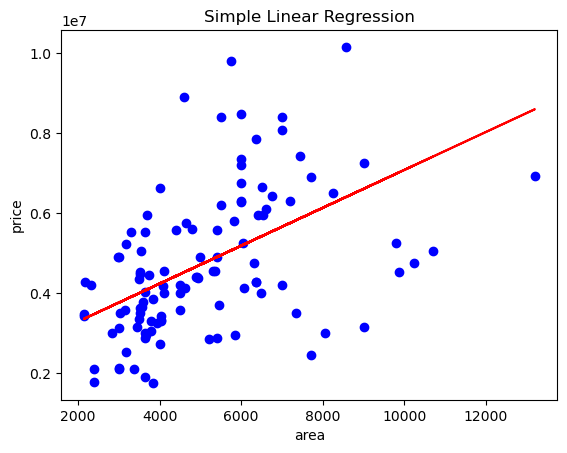

In [41]:
# Plot
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('area')
plt.ylabel('price')
plt.title('Simple Linear Regression')
plt.show()

In [43]:
#Using multiple features to predict the target

In [45]:
X = df.drop('price', axis=1)  # all features ecxept our target
y = df['price']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [49]:
# Metrics
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("Coefficients:", model.coef_)

MSE: 1036232037823.5747
R² Score: 0.63392979286059
Coefficients: [ 2.26278951e+02  1.69163144e+05  9.84662917e+05  4.67648580e+05
  3.03623723e+05  4.11284365e+05  2.22313162e+05  4.12333052e+05
  9.00547506e+05  9.26298011e+05  6.08431286e+05 -6.99762607e+04
 -4.13688109e+05]
